# **Predict Bike Sharing Demand with AutoGluon**

## Step 1: Create an account with Kaggle and download API key

## Step 2: Download the Kaggle dataset using the kaggle python library

### Install packages

In [ ]:
!pip install -U pip -q
!pip install -U setuptools wheel -q
!pip install -U "mxnet<2.0.0" bokeh==2.0.1 -q
!pip install autogluon --no-cache-dir -q
# Without --no-cache-dir, smaller aws instances may have trouble installing

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
conda 24.3.0 requires packaging>=23.0, but you have packaging 21.3 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geoviews 1.12.0 requires bokeh<3.5.0,>=3.4.0, but you have bokeh 2.0.1 which is incompatible.
panel 1.4.1 requires bokeh<3.5.0,>=3.4.0, but you have bokeh 2.0.1 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-cv 0.8.2 requires ker

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = ""
kaggle_key = ""

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 523kB/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 521kB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
df_train_ori = train.drop(columns=['datetime', 'casual', 'registered'], axis=1)

predictor = TabularPredictor(label="count").fit(
        train_data = df_train_ori,
        time_limit = 600,
        presets= "best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240506_062435"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240506_062435/ds_sub_fit/sub_fit_ho.
/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDepen

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -139.610795  root_mean_squared_error      10.737833  354.477421                0.001169           0.088548            3       True         19
1     ExtraTreesMSE_BAG_L2 -140.141948  root_mean_squared_error       9.851423  271.634134                0.734528           5.754137            2       True         17
2          CatBoost_BAG_L2 -140.999419  root_mean_squared_error       9.193097  289.613413                0.076202          23.733415            2       True         16
3        LightGBMXT_BAG_L2 -141.018834  root_mean_squared_error       9.536985  282.489061                0.420091          16.609063            2       True         13
4   NeuralNetFastAI_BAG_L2 -141.437951  root_mean_squared_error       9.505842  308.292257   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

<Axes: xlabel='model'>

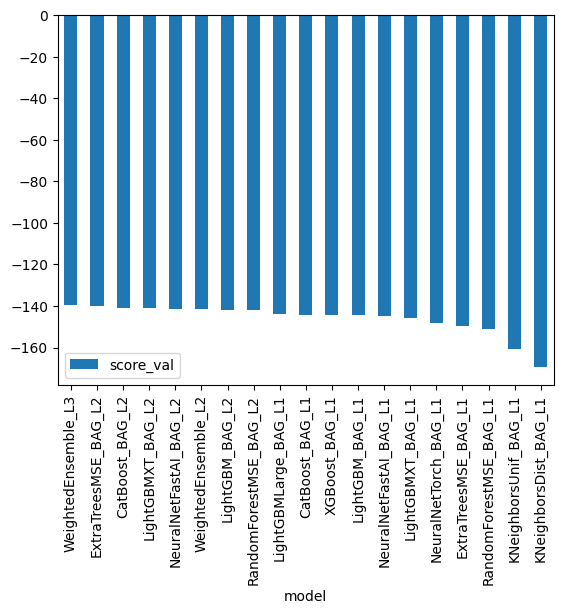

In [ ]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
train_1_eval = predictor.evaluate(df_train_ori)
train_1_eval

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


{'root_mean_squared_error': -117.80789965449112,
 'mean_squared_error': -13878.70122100265,
 'mean_absolute_error': -80.69984416954661,
 'r2': 0.5770016826385718,
 'pearsonr': 0.7701560781236989,
 'median_absolute_error': -56.291038513183594}

### Create predictions from test dataset

In [ ]:
# set up df_test
df_test_ori = test.drop(columns=['datetime'])

# prediction on test set
count_predictions = predictor.predict(df_test_ori)

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


In [ ]:
# Describe the `predictions` series to see if there are any negative values
count_predictions.describe()

count    6493.000000
mean      191.606232
std       109.697205
min        19.916481
25%       107.942657
50%       163.028305
75%       265.973969
max       628.745361
Name: count, dtype: float64

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# How many negative values do we have?
print((count_predictions < 0).sum())

# Set them to zero
count_predictions[count_predictions < 0] = 0

0


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["datetime"]= test["datetime"]
submission["count"] = count_predictions
submission.to_csv("submission_1.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_1.csv -m "first raw submission"

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
100%|█████████████████████████████████████████| 188k/188k [00:01<00:00, 118kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
fileName                         date                 description                                                 status    publicScore  privateScore  
-------------------------------  -------------------  ----------------------------------------------------------  --------  -----------  ------------  
submission_1.csv                 2024-05-06 06:39:08  first raw submission                                        complete  1.32509      1.32509       
submission_hpo_3.csv             2024-05-04 14:48:59  change some argument in hypo_3 and hyperpartune_3           complete  0.46699      0.46699       
submission_hpo_2.csv             2024-05-04 14:35:54  tuning 4 ml models                                          complete  0.46699      0.46699       
submission_hpo_1.csv             2

#### Initial score of `1.32509`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

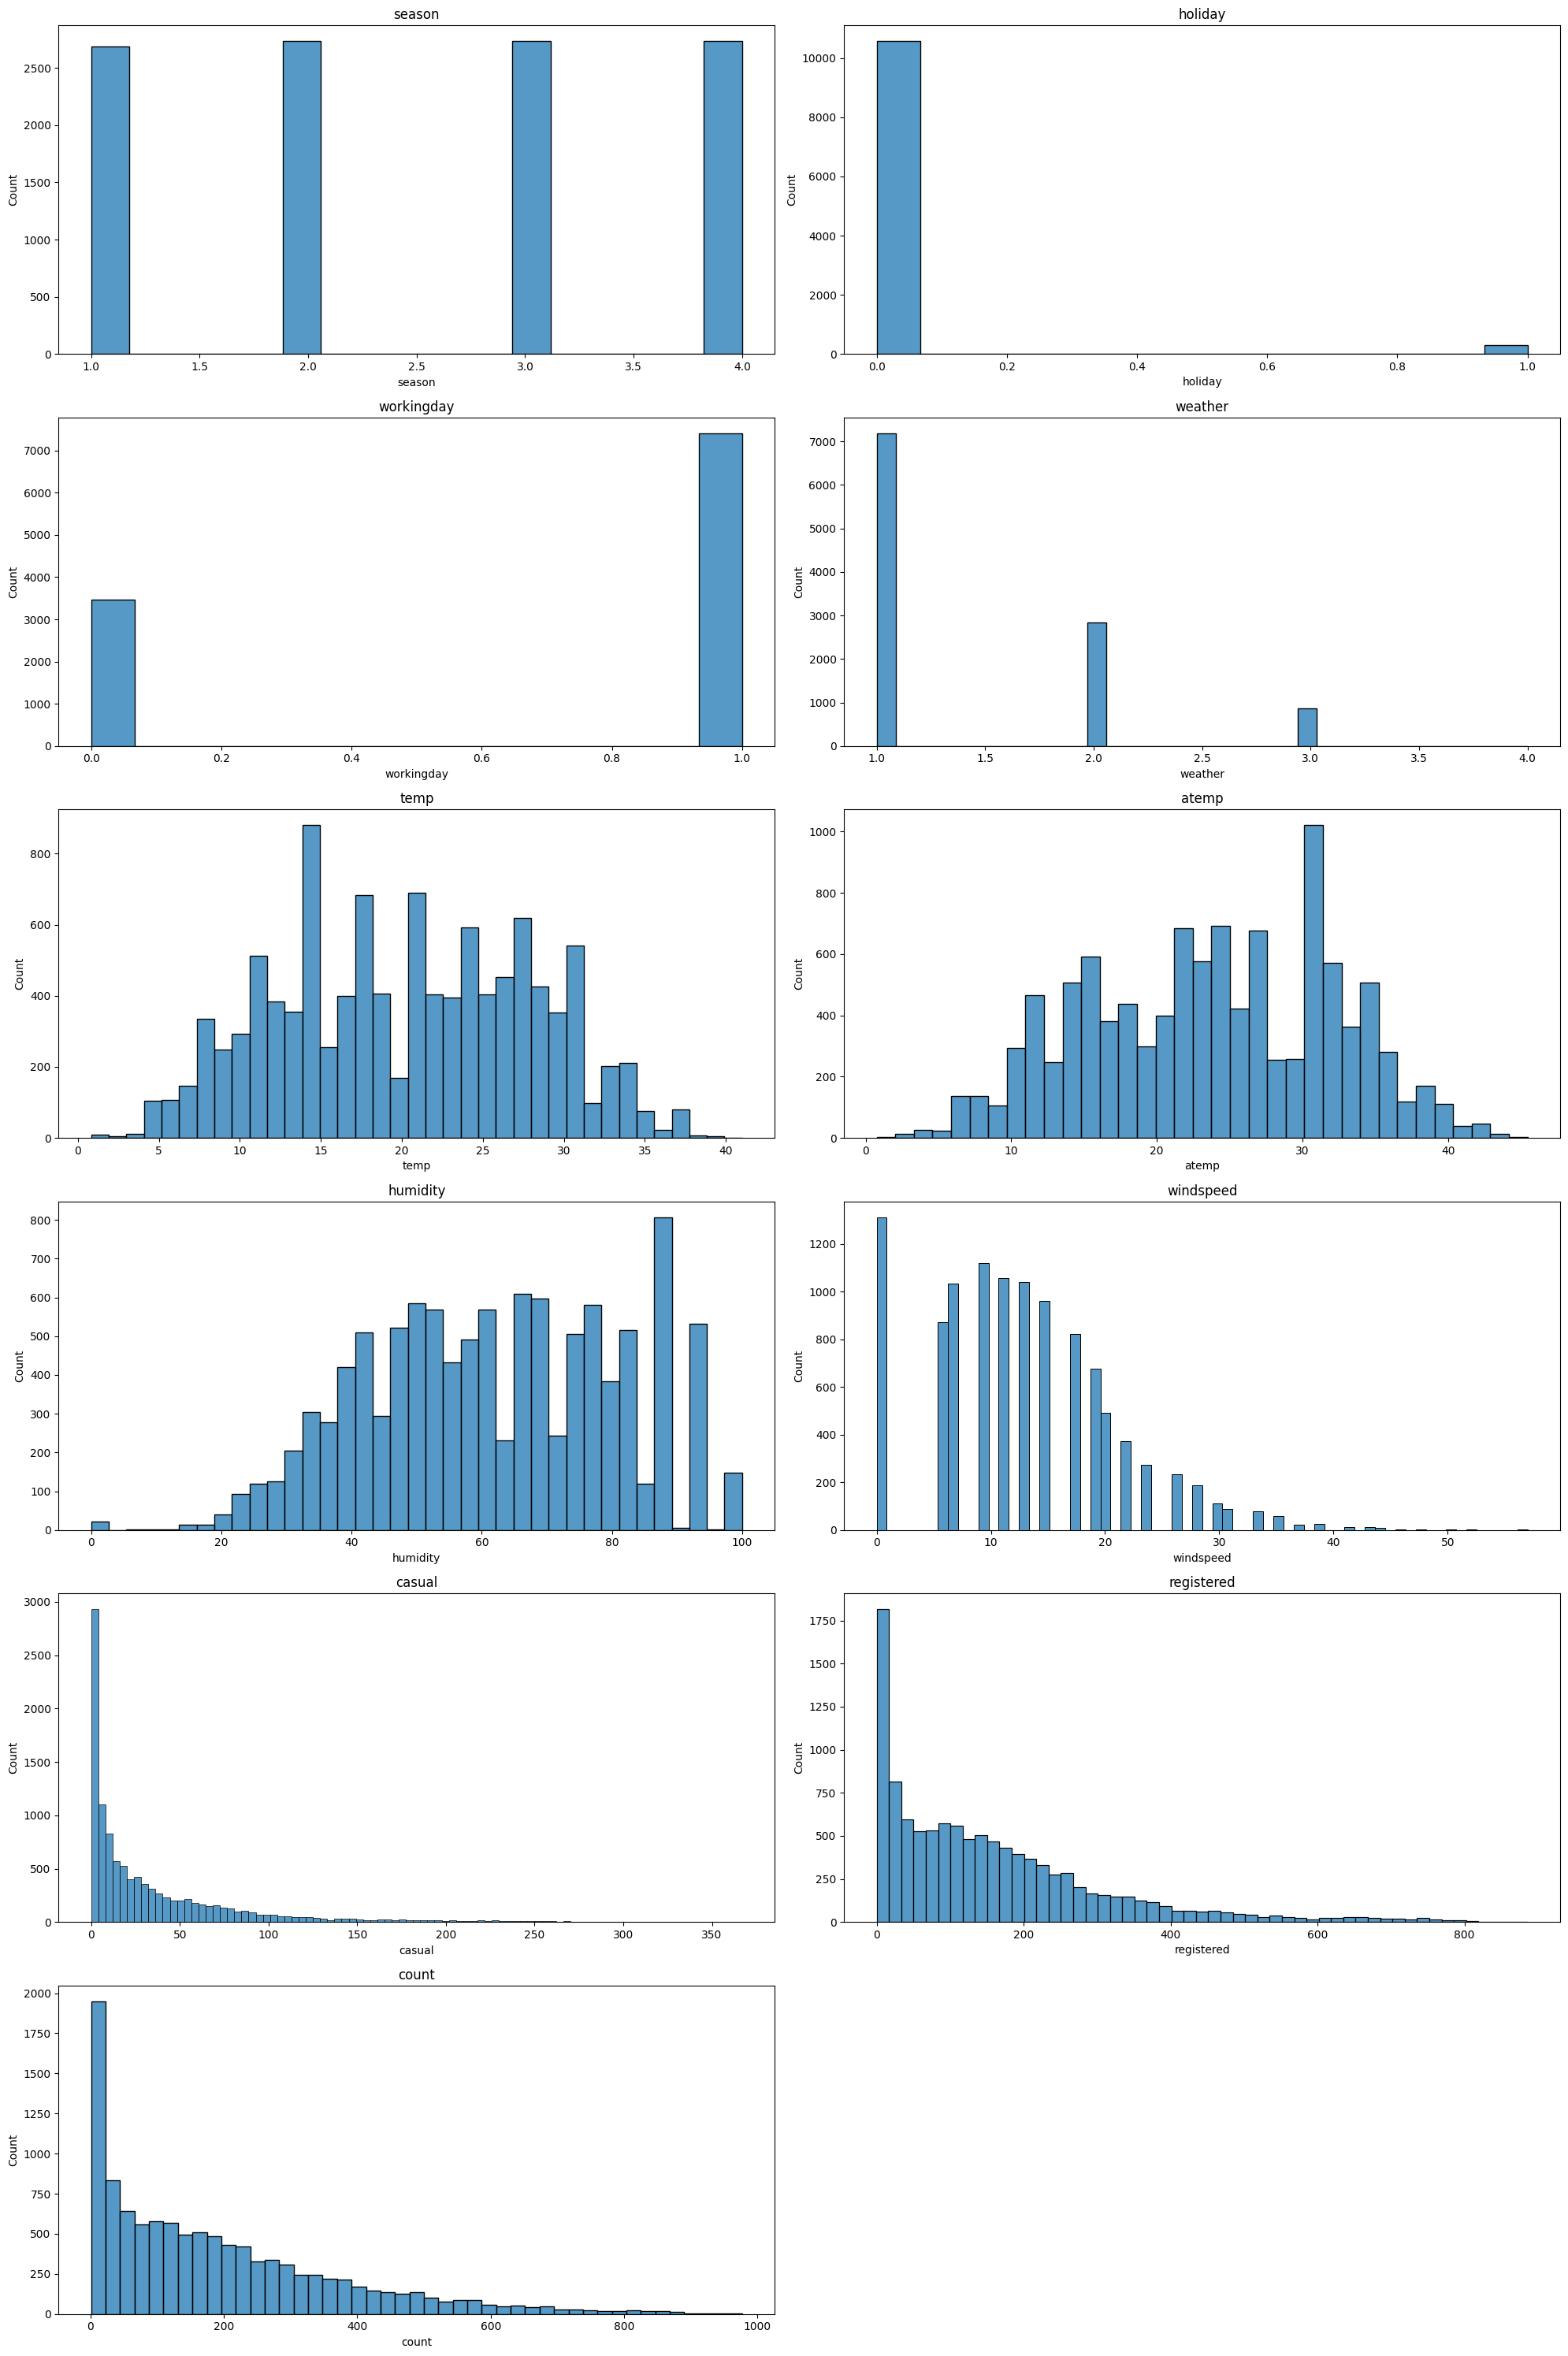

In [ ]:
# Select numerical columns
numerical_cols = train.select_dtypes(include=['float64', 'int64', 'int32'])

# Determine number of rows and columns for subplots
num_cols = numerical_cols.shape[1]
num_rows = (num_cols - 1) // 2 + 1  # Round up

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numerical_cols.columns):
    sns.histplot(numerical_cols[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# convert object to timestamp
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

# create a new feature
train["hour"] = train["datetime"].dt.hour
#train["weekend"]
#train["weekday"]
train["day"] = train["datetime"].dt.day
train["month"] = train["datetime"].dt.month
train["year"] = train["datetime"].dt.year

test["hour"] = test["datetime"].dt.hour
#["weekend"]
#["weekday"]
test["day"] = test["datetime"].dt.day
test["month"] = test["datetime"].dt.month
test["year"] = test["datetime"].dt.year

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
# int64 to category
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

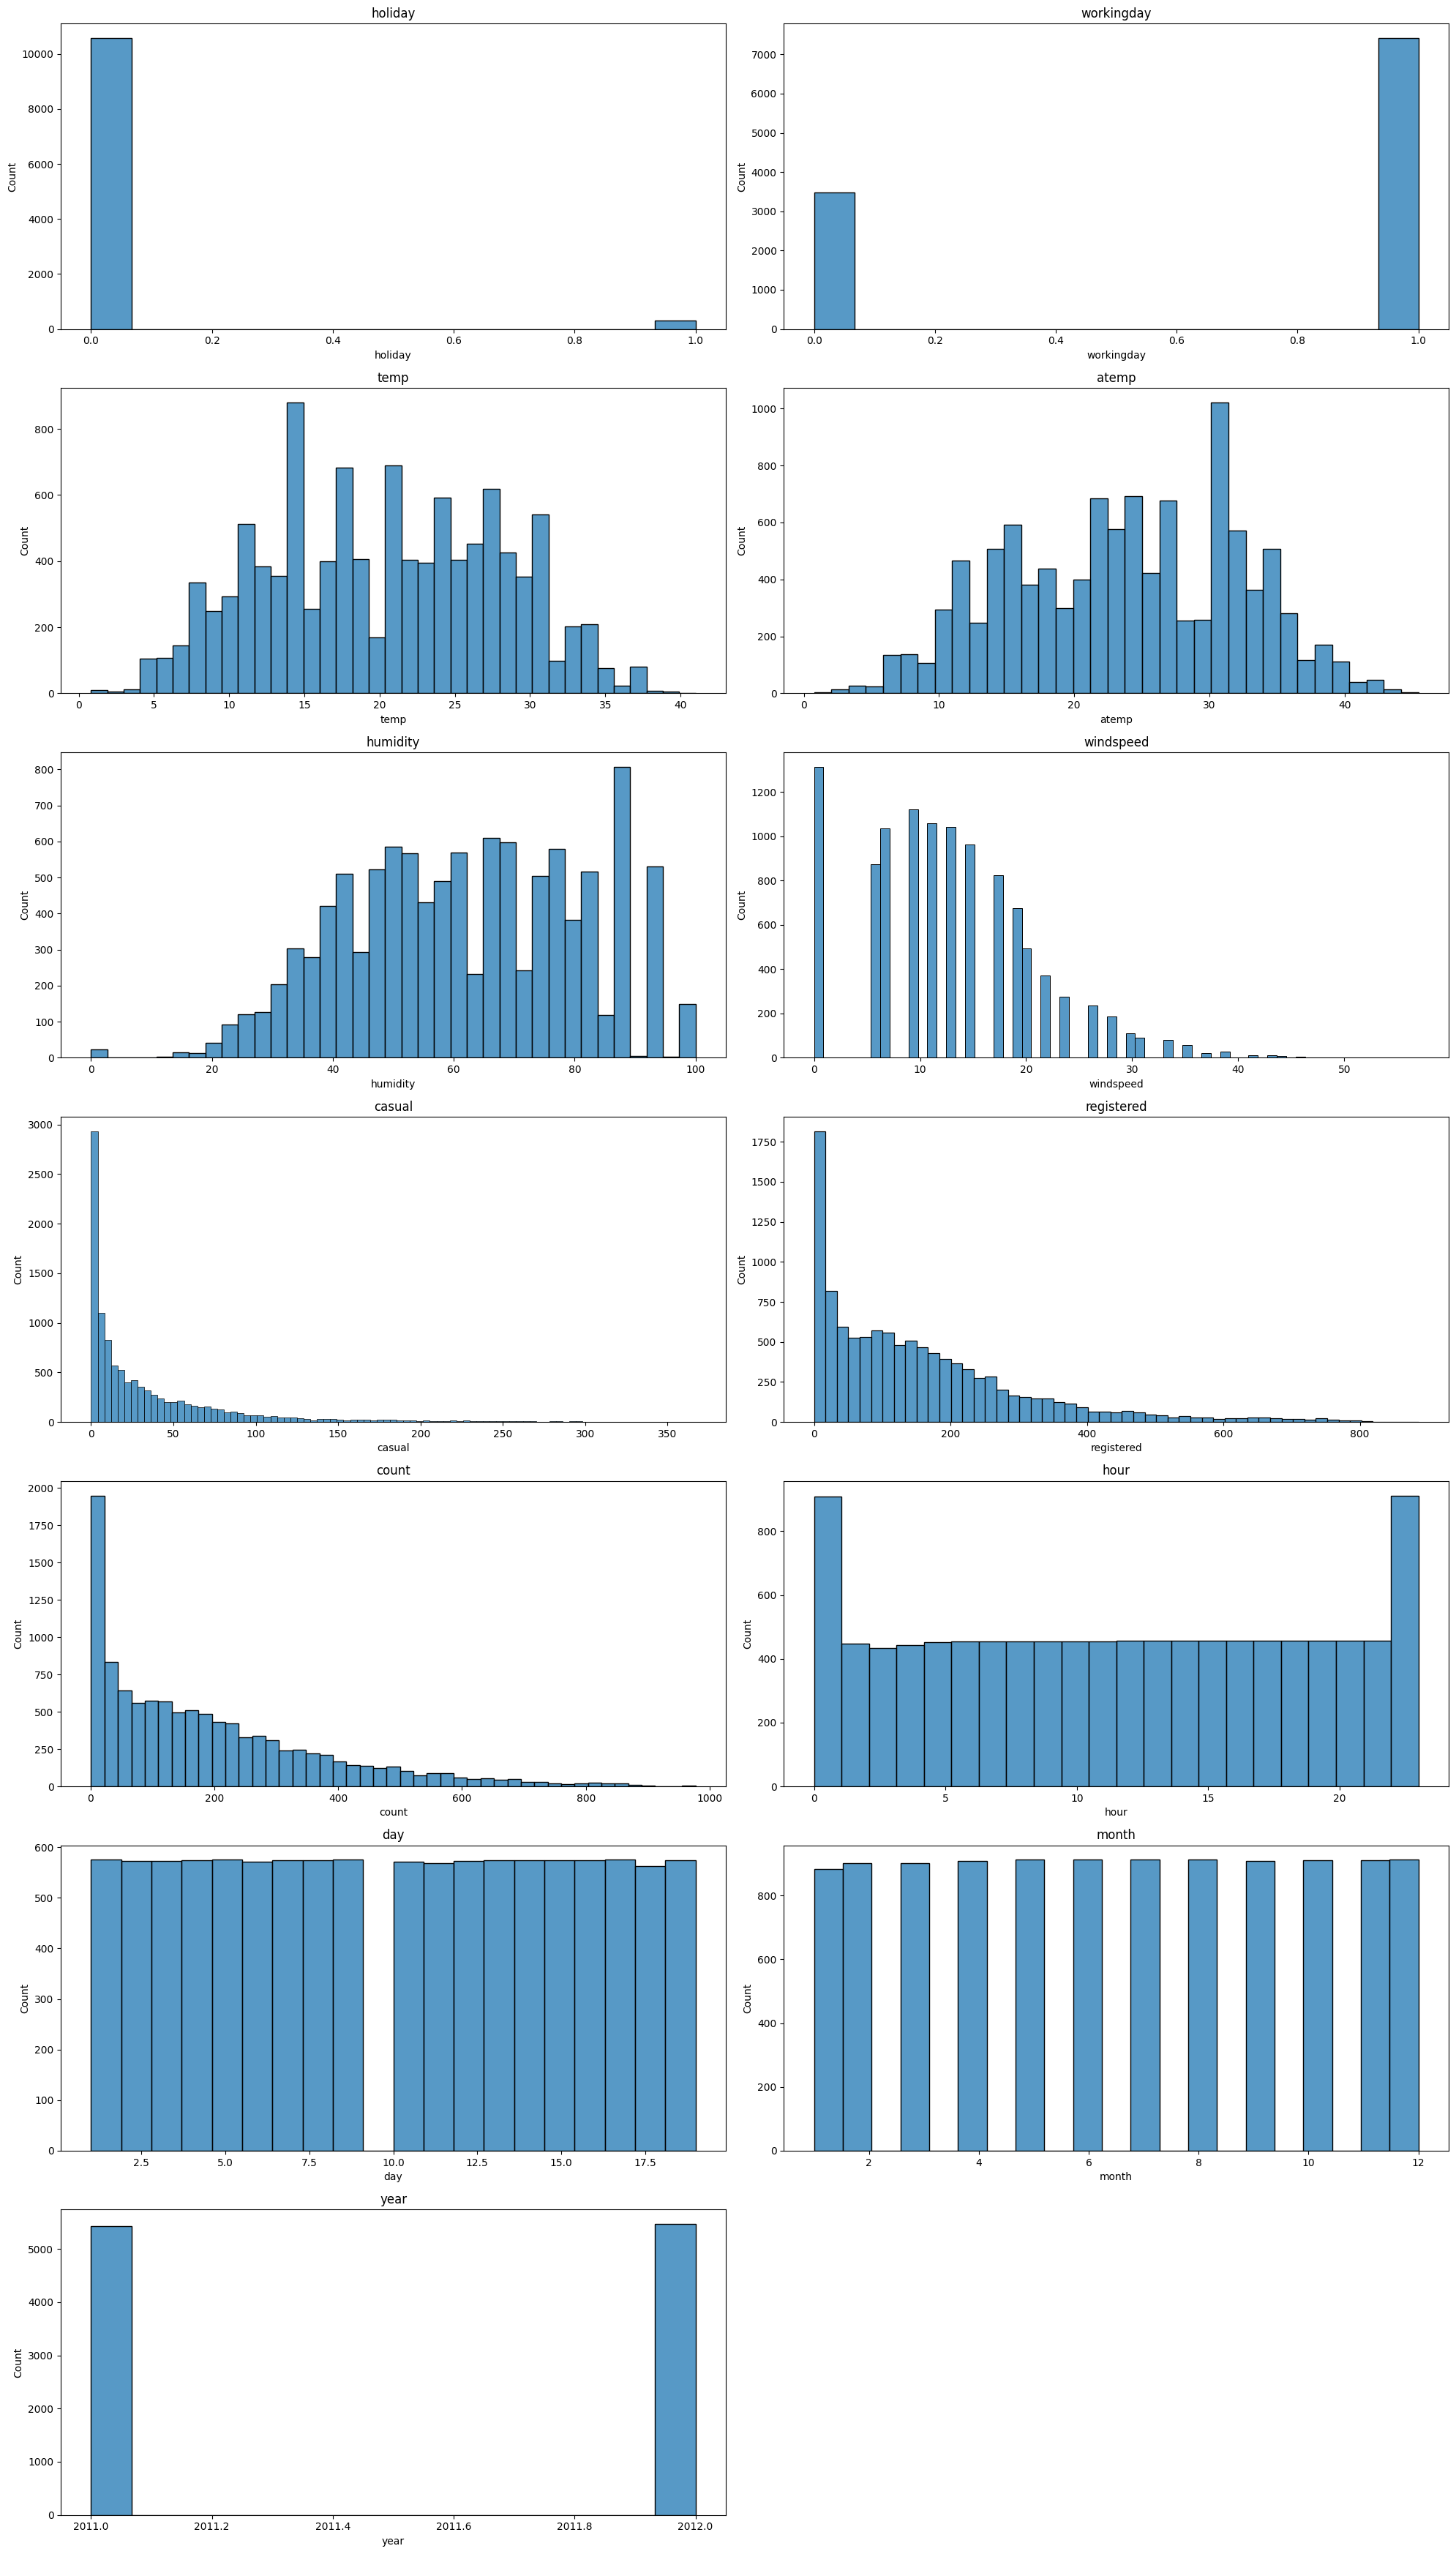

In [ ]:
# histplot with new features
# Select numerical columns
numerical_cols_2 = train.select_dtypes(include=['float64', 'int64', 'int32'])

# Determine number of rows and columns for subplots
num_cols = numerical_cols_2.shape[1]
num_rows = (num_cols - 1) // 2 + 1  # Round up

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

# Flatten axes if necessary
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numerical_cols_2.columns):
    sns.histplot(numerical_cols_2[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

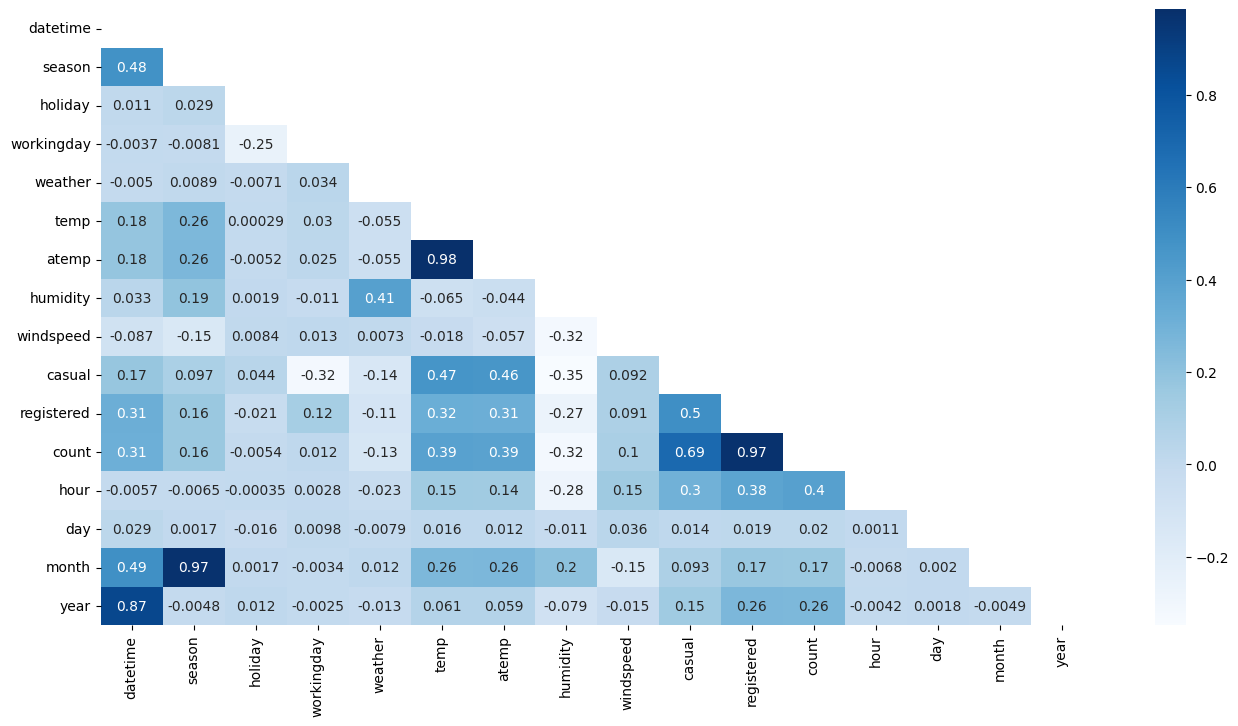

In [ ]:
# correlation metric
corr = train.corr()
plt.figure(figsize=(16,8))

#masking the upper triangle part (since matrix is repetitive)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Blues", annot=True)
plt.show()

In [ ]:
# time series analysis

def plot_line_graph(data, x_col, y_col, title, figsize=(25, 7), facecolor="#fff", grid_color="lightgrey", line_color="orangered", label_fontsize=15, tick_fontsize=12):
    fig = plt.figure(figsize=figsize)
    fig.set_facecolor(facecolor)
    ax = fig.add_subplot()
    ax.set_facecolor(facecolor)
    ax.grid(color=grid_color, alpha=0.7, linewidth=1, axis="both", zorder=0)
    sns.lineplot(x=x_col, y=y_col, color=line_color, err_style=None, data=data, linewidth=4, ax=ax, zorder=2)
    ax.yaxis.set_tick_params(color="#000", labelsize=tick_fontsize, pad=5, length=0)
    ax.set_ylabel(y_col.capitalize(), fontsize=label_fontsize, fontfamily="serif", labelpad=10)
    ax.set_xlabel(x_col.capitalize(), fontsize=label_fontsize, fontfamily="serif", labelpad=10)
    ax.xaxis.set_tick_params(color="#000", labelsize=tick_fontsize, pad=5, length=0)
    ax.yaxis.set_tick_params(color="#000", labelsize=tick_fontsize, pad=5, length=0)
    ax.set_title(title, loc="left", color="#000", fontsize=label_fontsize * 1.5, pad=5, fontweight="bold", fontfamily="serif", y=1.05, zorder=3)
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


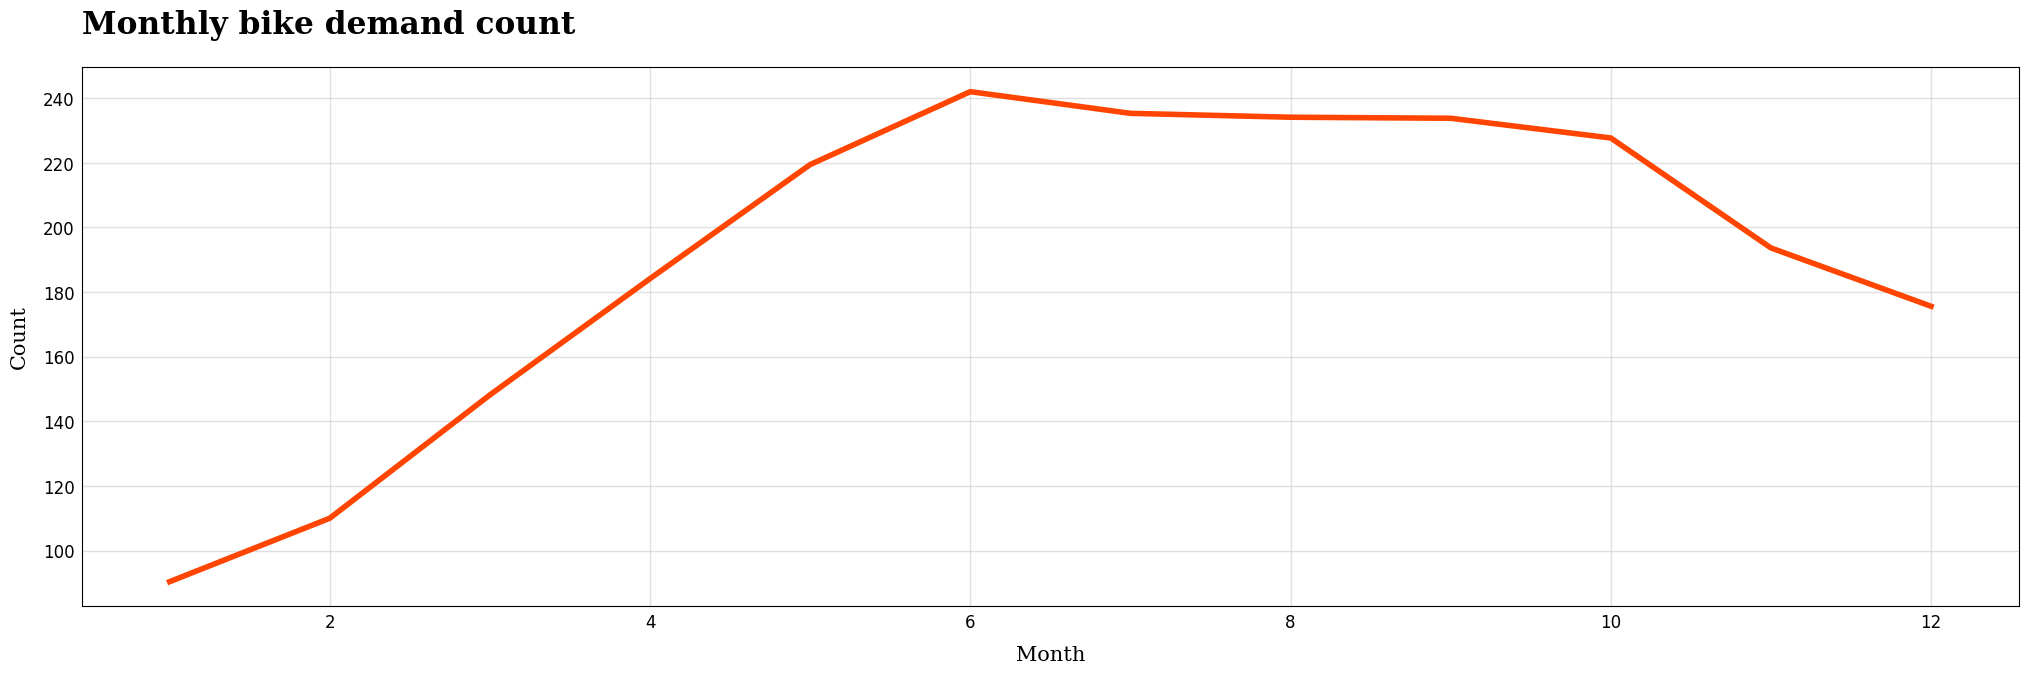

In [ ]:
# monthly bike demand count
plot_line_graph(train, "month", "count", "Monthly bike demand count")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


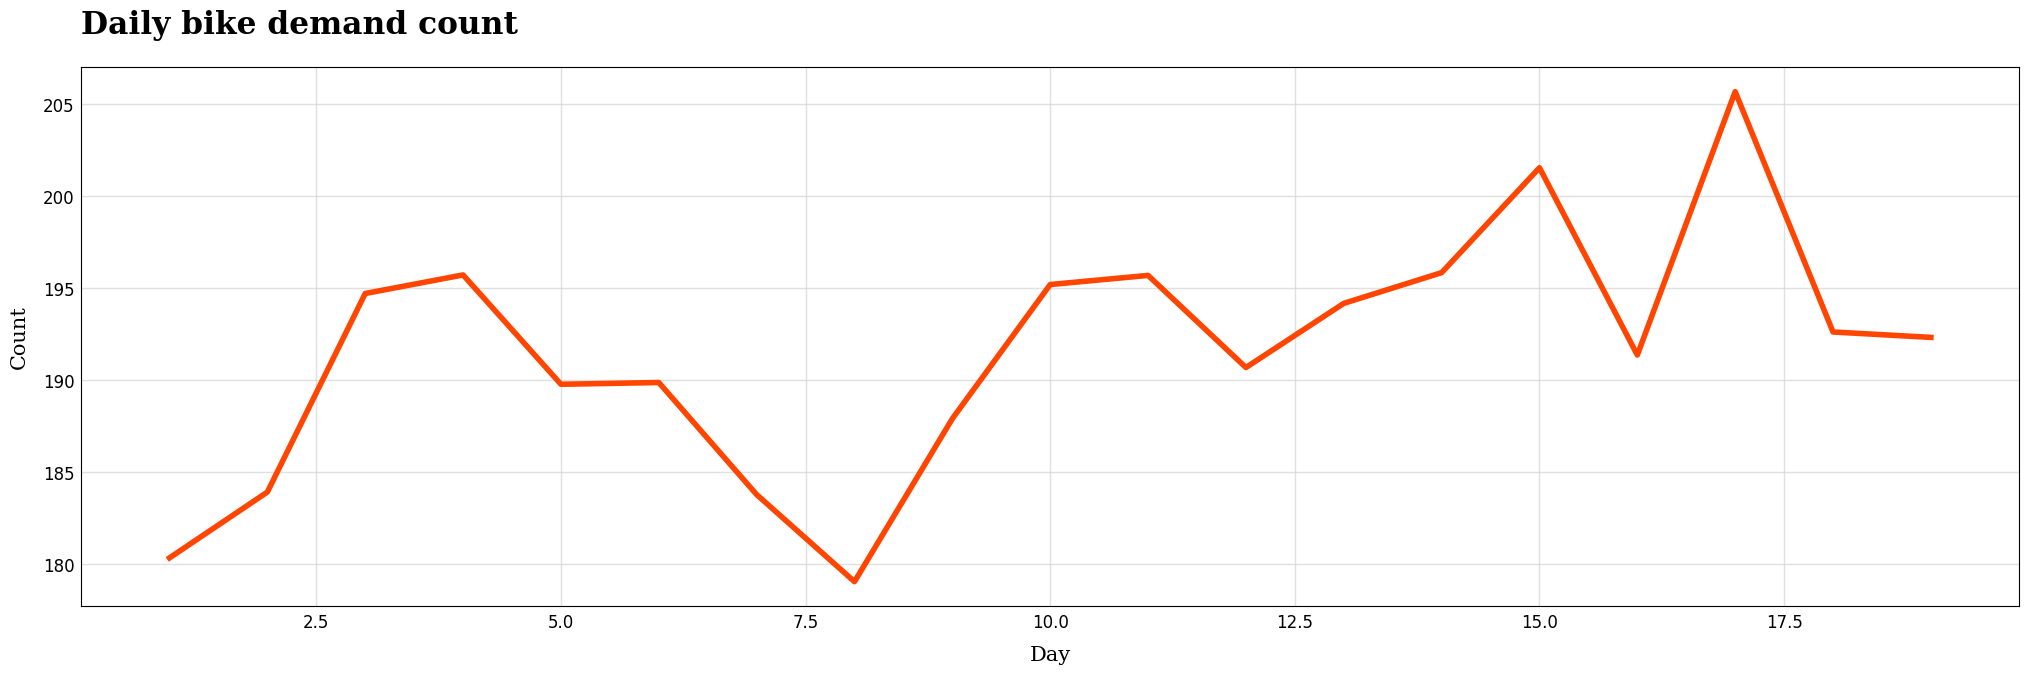

In [ ]:
# daily bike demand count
plot_line_graph(train, "day", "count", "Daily bike demand count")

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
df_train_added = train.drop(columns=['datetime', 'casual', 'registered'], axis=1)

predictor_new_features = TabularPredictor(label="count").fit(
    train_data = df_train_added,
    time_limit = 600,
    presets= "best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240506_070247"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240506_070247/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 164 seconds

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.782357  root_mean_squared_error     101.304045  345.656471                0.001148           0.063826            3       True         15
1      WeightedEnsemble_L2  -36.071566  root_mean_squared_error      98.508903  262.118707                0.000894           0.030607            2       True          8
2     ExtraTreesMSE_BAG_L2  -36.297958  root_mean_squared_error     100.046976  272.215979                0.724550           5.757721            2       True         13
3          CatBoost_BAG_L2  -36.411480  root_mean_squared_error      99.410584  299.665281                0.088157          33.207023            2       True         12
4          LightGBM_BAG_L2  -36.430503  root_mean_squared_error      99.676573  283.625982   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -124.05341445059767,
  'KNeighborsDist_BAG_L1': -119.57112809729891,
  'LightGBMXT_BAG_L1': -37.35959035683064,
  'LightGBM_BAG_L1': -

<Axes: xlabel='model'>

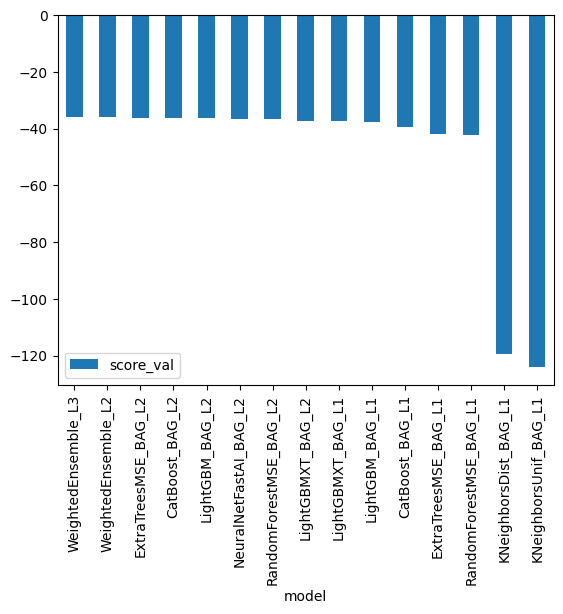

In [ ]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_new_features.evaluate(df_train_added)

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


{'root_mean_squared_error': -18.455585801901172,
 'mean_squared_error': -340.6086472913361,
 'mean_absolute_error': -11.779753952391683,
 'r2': 0.9896188496035238,
 'pearsonr': 0.9948352856087179,
 'median_absolute_error': -7.010383605957031}

In [ ]:
df_test_added = test.drop(columns="datetime", axis=1)

# predictions
count_predictions_new_feat = predictor_new_features.predict(df_test_added)

# print count of negative prediction
print((count_predictions_new_feat< 0).sum())

# Remember to set all negative values to zero
count_predictions_new_feat[count_predictions_new_feat < 0] = 0

INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


21


In [ ]:
# Same submitting predictions
my_datetime = test["datetime"]
count_predictions_new_feat

submission_new_features = pd.DataFrame(
    list(zip(my_datetime, count_predictions_new_feat)),
    columns = ["datetime", "count"]
)

submission_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
100%|█████████████████████████████████████████| 242k/242k [00:01<00:00, 191kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
fileName                         date                 description                                                 status    publicScore  privateScore  
-------------------------------  -------------------  ----------------------------------------------------------  --------  -----------  ------------  
submission_new_features.csv      2024-05-06 07:16:31  new features                                                complete  0.48189      0.48189       
submission_1.csv                 2024-05-06 06:39:08  first raw submission                                        complete  1.32509      1.32509       
submission_hpo_3.csv             2024-05-04 14:48:59  change some argument in hypo_3 and hyperpartune_3           complete  0.46699      0.46699       
submission_hpo_2.csv             2

#### New Score of `0.48189`

## Step 6: Hyper parameter optimization I
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
import autogluon.core as ag
from ray import tune

In [ ]:
hyperpar_tune = {
    'searcher': 'random',  # Use random search for hyperparameter tuning, option: "random"
    'max_tune_time': 3600,  # Maximum time to spend on hyperparameter tuning (in seconds)
    "scheduler": "local",
    "num_trials": 4
}

In [ ]:
# hyperparameter for FastAI Neural Network
fastai_opt = {
    'layer': tune.grid_search([200,100]),
    'lr': tune.grid_search([0.0001, 0.001]),
    'ps': tune.grid_search([0.0001, 0.002]),
    'emb_drop': tune.grid_search([0.0001, 0.005]),
    'epochs': tune.grid_search([8,24]),
    'early.stopping.patience': 5
}

# hyperparameter for CatBoost
catboost_opt = {
    'depth': tune.grid_search([5,25]),
    'l2_leaf_reg': tune.grid_search([0.05, 5])
}

hypo_1 = {
    'CAT': catboost_opt,
    'FASTAI': fastai_opt
}

In [ ]:
predictor_new_hpo = TabularPredictor(path='AutogluonModels/ag-hypo-1',
                                     label="count").fit(
    train_data = df_train_added,
    time_limit = 600,
    presets= "best_quality",
    hyperparameters = hypo_1,
    hyperparameter_tune_kwargs = hyperpar_tune
)

2024-05-06 07:24:28,097	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
Fitted model: NeuralNetFastAI_BAG_L2/4ec5a_00000 ...
	-118.3552	 = Validation score   (-root_mean_squared_error)
	37.45s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetFastAI_BAG_L2/4ec5a_00001 ...
	-118.3569	 = Validation score   (-root_mean_squared_error)
	38.3s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetFastAI_BAG_L2/4ec5a_00002 ...
	-108.0184	 = Validation score   (-root_mean_squared_error)
	62.57s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 186.66s of remaining time.
	Ensemble Weights: {'NeuralNetFastAI_BAG_L2/4ec5a_00002': 1.0}
	-108.0184	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                                model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetFastAI_BAG_L2/4ec5a_00002 -108.018383  root_mean_squared_error       0.000726  137.162715                0.000222          62.568480            2       True          6
1                 WeightedEnsemble_L3 -108.018383  root_mean_squared_error       0.001603  137.184994                0.000877           0.022279            3       True          7
2  NeuralNetFastAI_BAG_L2/4ec5a_00000 -118.355239  root_mean_squared_error       0.000698  112.047188                0.000195          37.452953            2       True          4
3  NeuralNetFastAI_BAG_L2/4ec5a_00001 -118.356921  root_mean_squared_error       0.000691  112.892939                0.000187          38.298705            2       True          5
4  NeuralNetFastAI_BAG_L1/f3a9b_00000 

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetFastAI_BAG_L1/f3a9b_00000': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetFastAI_BAG_L1/f3a9b_00001': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetFastAI_BAG_L2/4ec5a_00000': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetFastAI_BAG_L2/4ec5a_00001': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetFastAI_BAG_L2/4ec5a_00002': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetFastAI_BAG_L1/f3a9b_00000': -121.58484367069154,
  'NeuralNetFastAI_BAG_L1/f3a9b_00001': -121.58612689503964,
  'WeightedEnsemble_L2': -121.58484367069154,
  'NeuralNetFastAI_BAG_L2/4ec5a_00000': -118.35523929398636,
  'NeuralNetFastAI_BAG_L2/4ec5a_00001': -118.35692128863445,
  'NeuralNetFastAI_BAG_L2/4ec5a_00002': -108.018383179624,
  'WeightedEnsemble_L3': -108.018383179624},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'NeuralNetFast

<Axes: xlabel='model'>

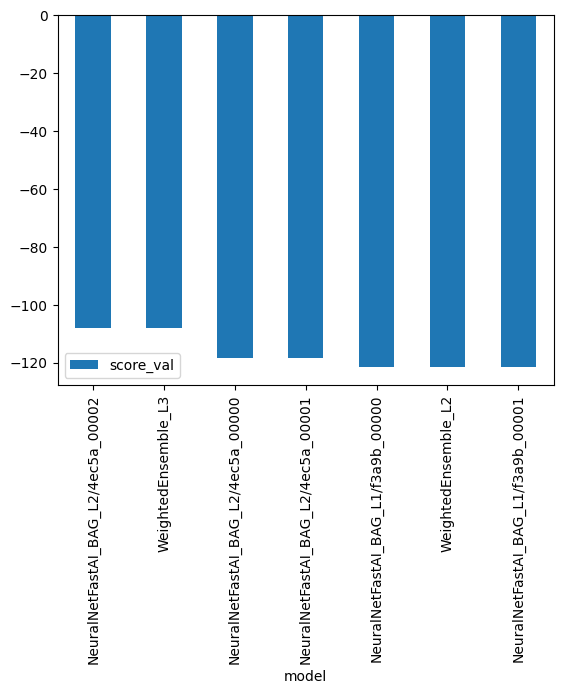

In [ ]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_new_hpo.evaluate(df_train_added)

{'root_mean_squared_error': -103.78339987836578,
 'mean_squared_error': -10770.994090312775,
 'mean_absolute_error': -72.04331411849257,
 'r2': 0.6717191108907639,
 'pearsonr': 0.8210720226708624,
 'median_absolute_error': -49.88288879394531}

In [ ]:
# prediction
count_with_hpo_1 = predictor_new_hpo.predict(df_test_added)

# Remember to set all negative values to zero
count_with_hpo_1[count_with_hpo_1 < 0] = 0

In [ ]:
# Same submitting predictions
my_datetime = test["datetime"]
count_with_hpo_1

submission_hpo_1 = pd.DataFrame(
    list(zip(my_datetime, count_with_hpo_1)),
    columns = ["datetime", "count"]
)

submission_hpo_1.to_csv("submission_hpo_1.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_hpo_1.csv -m "new features with hyperparameters: NNFastAI, CAT"

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
100%|█████████████████████████████████████████| 240k/240k [00:01<00:00, 175kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
fileName                         date                 description                                                 status    publicScore  privateScore  
-------------------------------  -------------------  ----------------------------------------------------------  --------  -----------  ------------  
submission_hpo_1.csv             2024-05-06 07:26:46  new features with hyperparameters: NNFastAI, CAT            complete  1.19842      1.19842       
submission_new_features.csv      2024-05-06 07:16:31  new features                                                complete  0.48189      0.48189       
submission_1.csv                 2024-05-06 06:39:08  first raw submission                                        complete  1.32509      1.32509       
submission_hpo_3.csv             2

#### New Score of `1.19842`

## Step 7: Hyperparameter Tuning II

In [ ]:
hyperpar_tune_2 = {
    'searcher': 'random',  # Use random search for hyperparameter tuning, option: "random"
    'max_tune_time': 3600,  # Maximum time to spend on hyperparameter tuning (in seconds)
    "scheduler": "local",
    "num_trials": 4
}

In [ ]:
# define search space
gbm_opt = {
    'learning_rate': tune.loguniform(0.01, 0.5),  # Adjust the learning rate
    'max_depth': tune.randint(3, 10),            # Maximum depth of the trees
    'min_child_weight': tune.randint(1, 10),      # Minimum sum of instance weight (hessian) needed in a child
    }

rf_opt = {
    'ag_args': {'name_suffix': 'MSE', 'problem_types':['regression']},
    'max_depth': tune.randint(3, 20),             # Maximum depth of the trees
    'min_samples_split': tune.randint(2, 20),      # Minimum number of samples required to split a node
    'min_samples_leaf': tune.randint(1, 20),       # Minimum number of samples required at each leaf node
    }

catb_opt = {
    #'iterations': tune.randint(50, 200),
    'learning_rate': tune.loguniform(0.01, 0.5),   # Learning rate
    'depth': tune.randint(3, 10),                  # Depth of the trees
    'l2_leaf_reg': tune.loguniform(1e-5, 100)
    }

xt_opt= {
    'criterion': 'squared_error',
    'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}
}

xgb_opt = {
    'n_estimators': tune.randint(50, 200),
    'learning_rate': tune.loguniform(0.01, 0.5),   # Boosting learning rate
    'max_depth': tune.randint(3, 10),              # Maximum depth of a tree
    'min_child_weight': tune.randint(1, 10),        # Minimum sum of instance weight (hessian) needed in a child
    }


hypo_2 = {
        'GBM': gbm_opt,
        'RF': rf_opt,
        'CAT': catb_opt,
        'XT': xt_opt,
        }

In [ ]:
predictor_new_hpo_2 = TabularPredictor(path='AutogluonModels/ag-hypo-2',
                                     label="count").fit(
    train_data = df_train_added,
    time_limit = 600,
    presets= "best_quality",
    hyperparameters = hypo_2,
    hyperparameter_tune_kwargs = hyperpar_tune_2
)

Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: /kaggle/working/AutogluonModels/ag-hypo-2/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 57 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of Auto

  0%|          | 0/4 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
ray::_ray_fit() (pid=16161, ip=172.19.2.2)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 404, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold, time_limit=time_limit_fold, **resources, **kwargs_fold)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 855, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/tabular/models/lgb/lgb_model.py", line 218, in _fit
    self.model = train_lgb_model(early_stopping_callback_kwargs=early_stopping_callback_kwargs, **train_params)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/tabular/models/lgb/lgb_utils.py", line 124, in train_lgb_model
    return lgb.train(**train_params)
  File "/opt/conda/lib/python3.10/site-

  0%|          | 0/4 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
ray::_ray_fit() (pid=16680, ip=172.19.2.2)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 404, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold, time_limit=time_limit_fold, **resources, **kwargs_fold)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 855, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/tabular/models/lgb/lgb_model.py", line 218, in _fit
    self.model = train_lgb_model(early_stopping_callback_kwargs=early_stopping_callback_kwargs, **train_params)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/tabular/models/lgb/lgb_utils.py", line 124, in train_lgb_model
    return lgb.train(**train_params)
  File "/opt/conda/lib/python3.10/site-

In [ ]:
predictor_new_hpo_2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -41.039688  root_mean_squared_error       0.001355  11.029425                0.000822           0.014213            3       True          4
1  ExtraTreesMSE_BAG_L2 -41.597750  root_mean_squared_error       0.000533  11.015212                0.000268           5.719044            2       True          3
2  ExtraTreesMSE_BAG_L1 -41.731457  root_mean_squared_error       0.000265   5.296168                0.000265           5.296168            1       True          1
3   WeightedEnsemble_L2 -41.731457  root_mean_squared_error       0.001097   5.300462                0.000832           0.004294            2       True          2
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_XT'}
Bagging used

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'ExtraTreesMSE_BAG_L1': -41.73145747933636,
  'WeightedEnsemble_L2': -41.73145747933636,
  'ExtraTreesMSE_BAG_L2': -41.597750450411795,
  'WeightedEnsemble_L3': -41.03968795797958},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'ExtraTreesMSE_BAG_L1': ['ExtraTreesMSE_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'ExtraTreesMSE_BAG_L2': ['ExtraTreesMSE_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'ExtraTreesMSE_BAG_L1': 5.296167612075806,
  'WeightedEnsemble_L2': 0.004294157028198242,
  'ExtraTreesMSE_BAG_L2': 5.71904444694519,
  'WeightedEnsemble_L3': 0.014213085174560547},
 'model_pred_times': {'ExtraTreesMSE_BAG_L1': 0.0002651214599609375,
  'WeightedEnsemble_L2': 0.0008323192596435

<Axes: xlabel='model'>

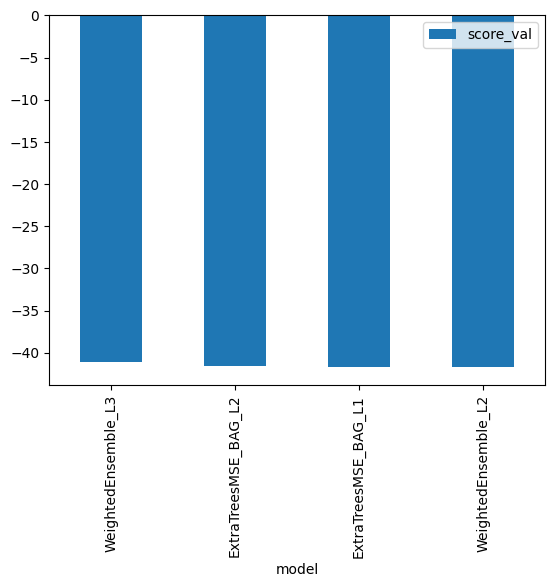

In [ ]:
predictor_new_hpo_2.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_new_hpo_2.evaluate(df_train_added)

{'root_mean_squared_error': -16.157251370574993,
 'mean_squared_error': -261.0567718519475,
 'mean_absolute_error': -10.055605793336548,
 'r2': 0.9920434503581594,
 'pearsonr': 0.9960939230929577,
 'median_absolute_error': -5.572025299072266}

In [ ]:
# predictions
count_with_hpo_2 = predictor_new_hpo_2.predict(df_test_added)

# Remember to set all negative values to zero
count_with_hpo_2[count_with_hpo_2 < 0] = 0

# Same submitting predictions
my_datetime = test["datetime"]
count_with_hpo_2

submission_hpo_2 = pd.DataFrame(
    list(zip(my_datetime, count_with_hpo_2)),
    columns = ["datetime", "count"]
)

submission_hpo_2.to_csv("submission_hpo_2.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_hpo_2.csv -m "new features with hyperparameters: GBM, RF, CAT, XT"

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
100%|█████████████████████████████████████████| 242k/242k [00:01<00:00, 128kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
fileName                         date                 description                                                 status    publicScore  privateScore  
-------------------------------  -------------------  ----------------------------------------------------------  --------  -----------  ------------  
submission_hpo_2.csv             2024-05-06 07:32:20  new features with hyperparameters: GBM, RF, CAT, XT         complete  0.46699      0.46699       
submission_hpo_1.csv             2024-05-06 07:26:46  new features with hyperparameters: NNFastAI, CAT            complete  1.19842      1.19842       
submission_new_features.csv      2024-05-06 07:16:31  new features                                                complete  0.48189      0.48189       
submission_1.csv                 2

## Hyperparameter Tuning 3

In [ ]:
hyperpar_tune_3 = {
    'searcher': 'random',
    'max_tune_time': 4800,  # Maximum time to spend on hyperparameter tuning (in seconds)
    "scheduler": "local",
    "num_trials": 7
}

In [ ]:
# define search space
catb_opt_new = {
    'iterations': tune.randint(50, 200),
    'learning_rate': tune.loguniform(0.01, 0.5),   # Learning rate
    'depth': tune.randint(3, 10),                  # Depth of the trees
    'l2_leaf_reg': tune.loguniform(1e-5, 100)
    }

xt_opt_new = {
    'criterion': 'squared_error',
    'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}
}

xgb_opt_new = {
    'n_estimators': tune.randint(50, 200),
    'learning_rate': tune.loguniform(0.01, 0.5),   # Boosting learning rate
    'max_depth': tune.randint(3, 10),              # Maximum depth of a tree
    'min_child_weight': tune.randint(1, 10),        # Minimum sum of instance weight (hessian) needed in a child
    'subsample': tune.uniform(0.5, 1.0),           # Subsample ratio of the training instances
    'colsample_bytree': tune.uniform(0.5, 1.0),    # Subsample ratio of columns when constructing each tree
    'reg_alpha': tune.loguniform(1e-5, 100),       # L1 regularization term on weights
    'reg_lambda': tune.loguniform(1e-5, 100)       # L2 regularization term on weights
}


hypo_3 = {
        'CAT': catb_opt_new,
        'XT': xt_opt_new,
        'XGB': xgb_opt_new
        }

In [ ]:
predictor_new_hpo_3 = TabularPredictor(path='AutogluonModels/ag-hypo-3',
                                     label="count").fit(
    train_data = df_train_added,
    time_limit = 4800,
    presets= "best_quality",
    hyperparameters = hypo_3,
    hyperparameter_tune_kwargs = hyperpar_tune_3
)

Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 4800 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: /kaggle/working/AutogluonModels/ag-hypo-3/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 18 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of Aut

In [ ]:
predictor_new_hpo_3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -41.039688  root_mean_squared_error       0.001338  11.459687                0.000821           0.014303            3       True          4
1  ExtraTreesMSE_BAG_L2 -41.597750  root_mean_squared_error       0.000516  11.445384                0.000245           6.038596            2       True          3
2  ExtraTreesMSE_BAG_L1 -41.731457  root_mean_squared_error       0.000271   5.406788                0.000271           5.406788            1       True          1
3   WeightedEnsemble_L2 -41.731457  root_mean_squared_error       0.001047   5.410866                0.000776           0.004078            2       True          2
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_XT'}
Bagging used

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'ExtraTreesMSE_BAG_L1': -41.73145747933636,
  'WeightedEnsemble_L2': -41.73145747933636,
  'ExtraTreesMSE_BAG_L2': -41.597750450411795,
  'WeightedEnsemble_L3': -41.03968795797958},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'ExtraTreesMSE_BAG_L1': ['ExtraTreesMSE_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'ExtraTreesMSE_BAG_L2': ['ExtraTreesMSE_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'ExtraTreesMSE_BAG_L1': 5.406787872314453,
  'WeightedEnsemble_L2': 0.0040776729583740234,
  'ExtraTreesMSE_BAG_L2': 6.038596153259277,
  'WeightedEnsemble_L3': 0.014302730560302734},
 'model_pred_times': {'ExtraTreesMSE_BAG_L1': 0.00027108192443847656,
  'WeightedEnsemble_L2': 0.0007760524749

<Axes: xlabel='model'>

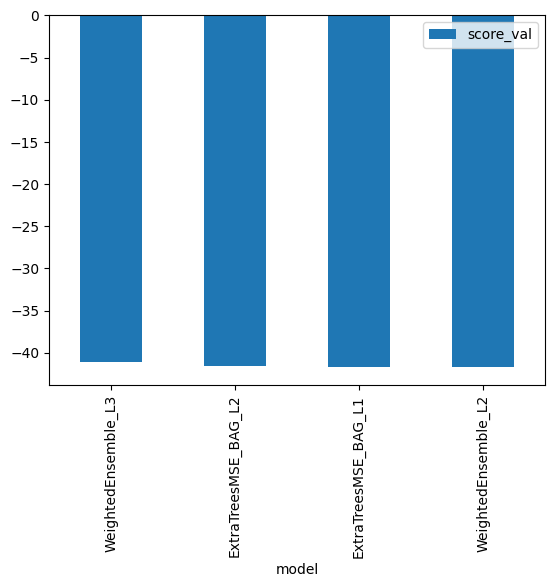

In [ ]:
predictor_new_hpo_3.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor_new_hpo_3.evaluate(df_train_added)

{'root_mean_squared_error': -16.157251370574993,
 'mean_squared_error': -261.0567718519475,
 'mean_absolute_error': -10.055605793336548,
 'r2': 0.9920434503581594,
 'pearsonr': 0.9960939230929577,
 'median_absolute_error': -5.572025299072266}

In [ ]:
# predictions
count_with_hpo_3 = predictor_new_hpo_3.predict(df_test_added)

# Remember to set all negative values to zero
count_with_hpo_3[count_with_hpo_3 < 0] = 0

# Same submitting predictions
my_datetime = test["datetime"]
count_with_hpo_3

submission_hpo_3 = pd.DataFrame(
    list(zip(my_datetime, count_with_hpo_3)),
    columns = ["datetime", "count"]
)

submission_hpo_3.to_csv("submission_hpo_3.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_hpo_1.csv -m "new features with hyperparameters: CAT, XT, XGB"

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
100%|█████████████████████████████████████████| 240k/240k [00:01<00:00, 132kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/opt/conda/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
fileName                         date                 description                                                 status    publicScore  privateScore  
-------------------------------  -------------------  ----------------------------------------------------------  --------  -----------  ------------  
submission_hpo_1.csv             2024-05-06 07:35:09  new features with hyperparameters: CAT, XT, XGB             complete  1.19842      1.19842       
submission_hpo_2.csv             2024-05-06 07:32:20  new features with hyperparameters: GBM, RF, CAT, XT         complete  0.46699      0.46699       
submission_hpo_1.csv             2024-05-06 07:26:46  new features with hyperparameters: NNFastAI, CAT            complete  1.19842      1.19842       
submission_new_features.csv      2

## Step 7: Write a Report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

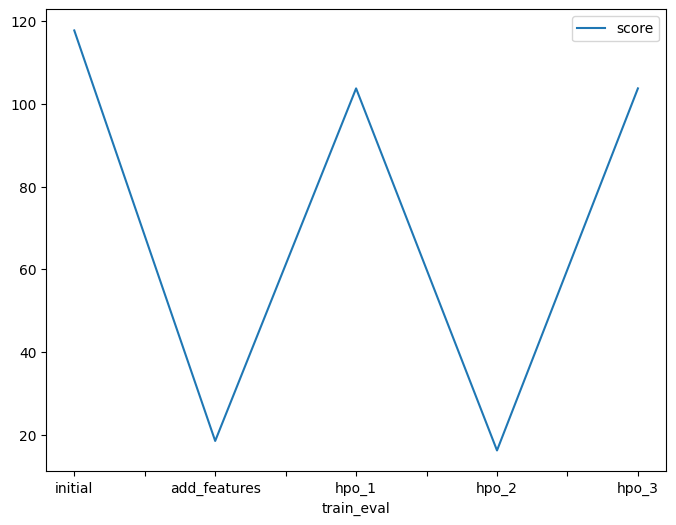

In [ ]:
# TRAIN SCORE
# Take the 4 model scores and creating a line plot to show improvement
fig_train = pd.DataFrame(
    {
        "train_eval": ["initial", "add_features", "hpo_1", "hpo_2", "hpo_3"],
        "score": [117.808, 18.456, 103.783, 16.157, 103.783]
    }
).plot(x="train_eval", y="score", figsize=(8, 6)).get_figure()
fig_train.savefig('model_train_score.png')

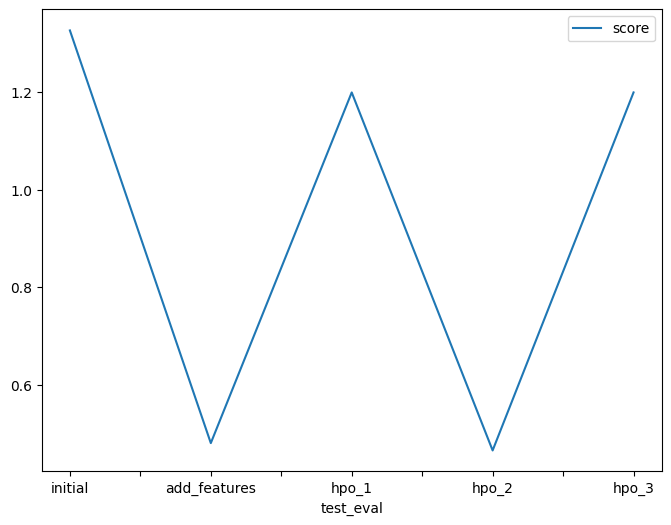

In [ ]:
# TEST SCORE
# Take the 4 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo_1", "hpo_2", "hpo_3"],
        "score": [1.32509, 0.48189, 1.19842, 0.46689, 1.19842]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model_name": ["initial",
              "add_features",
              "hpo_1",
              "hpo_2",
              "hpo_3"],
    "par1": ["original columns",
             "extract year, month, day, hour from datetime",
             "added features",
             "added features",
             "added features"],
    "par2": ["time_limit=600",
            "time_limit=600",
            "hyperpar_tune={searcher:random,max_tune_time:3600,scheduler:local,num_trials:4}",
            "hyperpar_tune=same like hpo1",
            "hyperpar_tune=same like hpo2, change max_tune_time to 4800",
            ],
    "par3": ["presets=best_quality",
             "presets=best_quality",
             "CAT, NeuralNetFastAI",
             "GBM, RF, CAT, FT",
             "CAT, XT, XGB adding more search space in each model"
            ],
    "score": [1.32509, 0.48189, 1.19842, 0.46689, 1.19842]
})

,model_name,par1,par2,par3,score
0,initial,original columns,time_limit=600,presets=best_quality,1.32509
1,add_features,"extract year, month, day, hour from datetime",time_limit=600,presets=best_quality,0.48189
2,hpo_1,added features,"hyperpar_tune={searcher:random,max_tune_time:3600,scheduler:local,num_trials:4}","CAT, NeuralNetFastAI",1.19842
3,hpo_2,added features,hyperpar_tune=same like hpo1,"GBM, RF, CAT, FT",0.46689
4,hpo_3,added features,"hyperpar_tune=same like hpo2, change max_tune_time to 4800","CAT, XT, XGB adding more search space in each model",1.19842
